In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

In [3]:
class path:
    def __init__(self, x):
        self.path = x
        self.orientation = math.atan2(x[-1][1]-x[-2][1], x[-1][0]-x[-2][0])
        self.theta = math.atan2(x[-1][1]-x[0][1], x[-1][0]-x[0][0])
        self.last_point = x[-1]
        self.r=math.sqrt((x[-1][0])**2+(x[-1][1])**2)
class node:
    def __init__(self):
        self.path = None
        self.x = None
        self.y = None
        self.yaw = None
        self.parent = None
        self.children = []
        self.id=0
class loc:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.occupancy = 0
        self.path_ids=[]

In [4]:
grid={}
xc=[]
yc=[]
for i in range(-100, 100):
    for j in range(-100, 100):
        grid[(i, j)]=loc(i, j) 
        xc.append(grid[(i, j)].x) 
        yc.append(grid[(i, j)].y) 

In [5]:
useless = [96, 97, 98, 99, 100, 101,102,103,104,105,106,107,108, 109, 110, 111, 112, 113,114,115,116,121,118,123,124,125,126,127]

In [6]:
all_paths=np.load('paths32.npy')
all_rel_paths= []
for i in range(all_paths.shape[0]):
    if (all_paths[i][-1] == 2): 
        all_rel_paths.append(all_paths[i])
all_rel_paths_ids=[]
for i in range(len(all_rel_paths)):
    if (all_rel_paths[i][3] not in all_rel_paths_ids):
        if (all_rel_paths[i][3] in useless):
            continue
        all_rel_paths_ids.append(all_rel_paths[i][3])
print("number of relative paths: ", len(all_rel_paths_ids))
path_dict={}
for i in range(len(all_rel_paths_ids)):
    path_dict[all_rel_paths_ids[i]] = []
plx=[]
ply=[]
for i in range(len(all_rel_paths)):
    if (all_rel_paths[i][3] in path_dict.keys()):
        path_dict[all_rel_paths[i][3]].append(all_rel_paths[i])
        plx.append(all_rel_paths[i][0])
        ply.append(all_rel_paths[i][1])
paths={}
for i in range(len(all_rel_paths_ids)):
    if path_dict[all_rel_paths_ids[i]] !=[]:
        paths[i] = path(path_dict[all_rel_paths_ids[i]])

number of relative paths:  4


In [7]:
plnewx=[]
plnewy=[]
used=[]
for i in range(len(all_rel_paths)):
    if (all_rel_paths[i][3] in path_dict.keys()):
        if (all_rel_paths[i][3] in useless):
            continue
        used.append(all_rel_paths[i][3])
        path_dict[all_rel_paths[i][3]].append(all_rel_paths[i])
        plnewx.append(all_rel_paths[i][0])
        plnewy.append(all_rel_paths[i][1])
used=np.unique(used)
print((used))

[117. 119. 120. 122.]


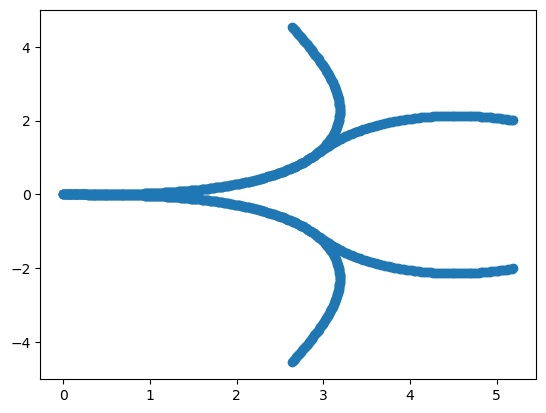

In [8]:
plt.scatter(plx,ply)

In [9]:
#this is when odom goes in
odom = [0,0,0]

In [10]:
def valid_path(path_id,node_id):
    print('path id',path_id)
    for i in range(len(paths[path_id].path)):
        rad=math.sqrt((paths[path_id].path[i][0])**2+(paths[path_id].path[i][1])**2)
        theta=math.atan2(paths[path_id].path[i][1],paths[path_id].path[i][0])
        xnew=nodes[node_id].x+rad*math.cos(theta+nodes[node_id].yaw)
        ynew=nodes[node_id].y+rad*math.sin(theta+nodes[node_id].yaw)
        if (grid[(int(xnew),int(ynew))].occupancy==1):
            return False
    return True
    
def draw_children(node_id,node_ids):
    node_counter = node_ids[-1]
    for i in range(len(used)):
        node_counter+=1
        if (not valid_path(i,node_id)):
            continue
        rad=paths[i].r
        theta=paths[i].theta
        # print("theta: ", theta)
        xnew=nodes[node_id].x+rad*math.cos(theta+nodes[node_id].yaw)
        ynew=nodes[node_id].y+rad*math.sin(theta+nodes[node_id].yaw)
        theta_new=paths[i].orientation+nodes[node_id].yaw
        nodes[node_counter]=node()
        nodes[node_counter].x=xnew
        nodes[node_counter].y=ynew
        nodes[node_counter].yaw=theta_new
        nodes[node_counter].id=node_counter
        nodes[node_counter].parent=node_id
        nodes[node_id].children.append(node_counter)
        next_ids.append(node_counter)
    return node_counter


In [11]:
nodes={}
global node_counter
node_counter=0
node_ids=[]
current_ids=[]
next_ids=[]
node_ids.append(0)
nodes[0]=node()
nodes[0].x=odom[0]
nodes[0].y=odom[1]
nodes[0].yaw=odom[2]
nodes[0].id=0
current_ids=[]
next_ids=[0]
for i in tqdm(range(3)):
    current_ids=next_ids
    next_ids=[]
    for j in range(len(current_ids)):
        print('id',current_ids[j],node_ids)
        node_ids.append(draw_children(current_ids[j],node_ids))
print("number of paths: ", len(paths))
print("number of nodes: ", len(nodes))
print("number of current nodes: ", len(current_ids))
print("number of next nodes: ", len(next_ids))

100%|██████████| 3/3 [00:00<00:00, 50.16it/s]

id 0 [0]
path id 0
path id 1
path id 2
path id 3
id 1 [0, 4]
path id 0
path id 1
path id 2
path id 3
id 2 [0, 4, 8]
path id 0
path id 1
path id 2
path id 3
id 3 [0, 4, 8, 12]
path id 0
path id 1
path id 2
path id 3
id 4 [0, 4, 8, 12, 16]
path id 0
path id 1
path id 2
path id 3
id 5 [0, 4, 8, 12, 16, 20]
path id 0
path id 1
path id 2
path id 3
id 6 [0, 4, 8, 12, 16, 20, 24]
path id 0
path id 1
path id 2
path id 3
id 7 [0, 4, 8, 12, 16, 20, 24, 28]
path id 0
path id 1
path id 2
path id 3
id 8 [0, 4, 8, 12, 16, 20, 24, 28, 32]
path id 0
path id 1
path id 2
path id 3
id 9 [0, 4, 8, 12, 16, 20, 24, 28, 32, 36]
path id 0
path id 1
path id 2
path id 3
id 10 [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
path id 0
path id 1
path id 2
path id 3
id 11 [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44]
path id 0
path id 1
path id 2
path id 3
id 12 [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]
path id 0
path id 1
path id 2
path id 3
id 13 [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52]
path id 0
p

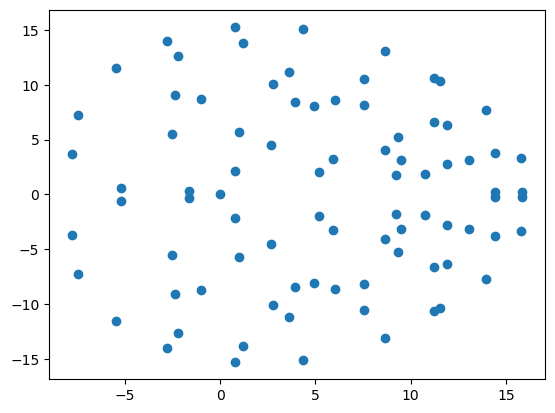

In [12]:
plnx=[]
plny=[]
for i in nodes.keys():
    plnx.append(nodes[i].x)
    plny.append(nodes[i].y)
plt.scatter(plnx,plny)
# plt.scatter(plx,ply)

In [13]:
useless=[96, 97, 98, 100, 101, 108,109,110,111,112,114,115,116,117,118,119,120,121,122,123]

In [14]:
path_ids

NameError: name 'path_ids' is not defined

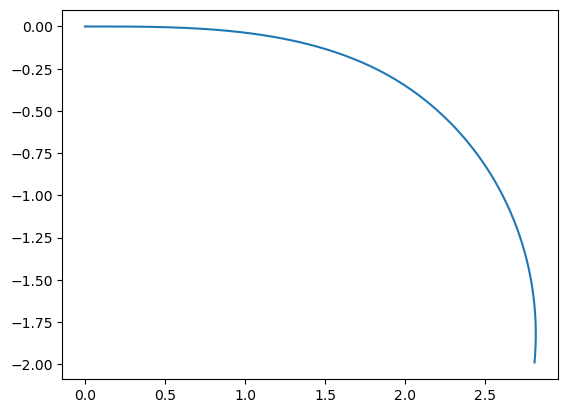

In [15]:
pathx=[]
pathy=[]
for i in range(len(all_rel_paths)):
    if (all_rel_paths[i][3] == 102.0):
        pathx.append(all_rel_paths[i][0])
        pathy.append(all_rel_paths[i][1])
plt.plot(pathx,pathy)

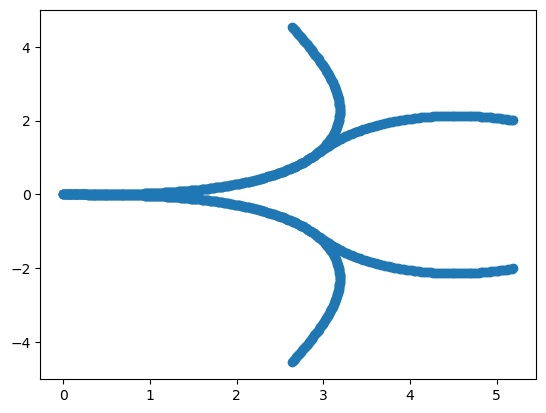

In [16]:
plt.scatter(plx,ply)

In [17]:
# useless = [96, 97, 98, 99, 100, 101, 108, 109, 110, 111, 112, 113]
useless = [96, 97, 98, 99, 100, 101,102,103,104,105,106,107,108, 109, 110, 111, 112, 113,114,115,116,121,118,123,124,125,126,127]

In [18]:
plnewx=[]
plnewy=[]
used=[]
for i in range(len(all_rel_paths)):
    if (all_rel_paths[i][3] in path_dict.keys()):
        if (all_rel_paths[i][3] in useless):
            continue
        used.append(all_rel_paths[i][3])
        path_dict[all_rel_paths[i][3]].append(all_rel_paths[i])
        plnewx.append(all_rel_paths[i][0])
        plnewy.append(all_rel_paths[i][1])
used=np.unique(used)
print((used))

[117. 119. 120. 122.]


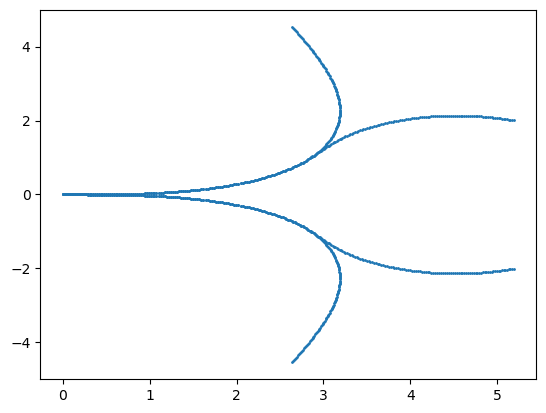

In [19]:
plt.scatter(plnewx,plnewy,s=1)

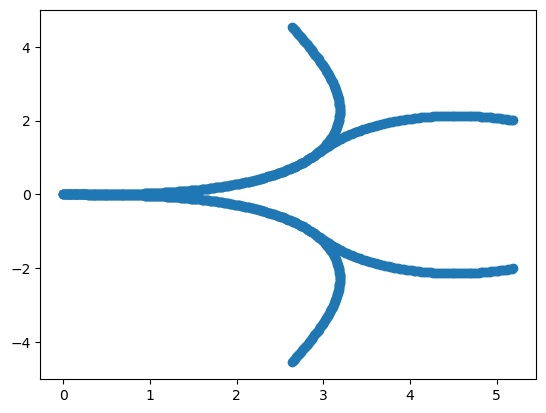

In [20]:
plt.scatter(plnewx,plnewy)
    

In [21]:
all_rel_paths

[array([ 0.,  0.,  2., 96.,  2.]),
 array([2.0000e-02, 0.0000e+00, 1.9935e+00, 9.6000e+01, 2.0000e+00]),
 array([3.9935e-02, 0.0000e+00, 1.9870e+00, 9.6000e+01, 2.0000e+00]),
 array([ 5.98049937e-02, -1.58527920e-05,  1.98050000e+00,  9.60000000e+01,
         2.00000000e+00]),
 array([ 7.96099371e-02, -6.32030440e-05,  1.97400000e+00,  9.60000000e+01,
         2.00000000e+00]),
 array([ 9.93497117e-02, -1.57538155e-04,  1.96750000e+00,  9.60000000e+01,
         2.00000000e+00]),
 array([ 1.19024088e-01, -3.14238620e-04,  1.96100000e+00,  9.60000000e+01,
         2.00000000e+00]),
 array([ 1.38632687e-01, -5.48628421e-04,  1.95450000e+00,  9.60000000e+01,
         2.00000000e+00]),
 array([ 1.58174945e-01, -8.76025949e-04,  1.94800000e+00,  9.60000000e+01,
         2.00000000e+00]),
 array([ 1.77650070e-01, -1.31179603e-03,  1.94150000e+00,  9.60000000e+01,
         2.00000000e+00]),
 array([ 1.97057003e-01, -1.87140363e-03,  1.93500000e+00,  9.60000000e+01,
         2.00000000e+00]),
 

In [30]:
# Must transform paths to global frame before this step
np_paths=np.array(all_rel_paths)
for i in tqdm(range(np_paths.shape[0])):
    for j in range(len(xc)):
      # for k in range(len(yc)):
        if (math.sqrt((all_rel_paths[i][0]-xc[j])**2+(all_rel_paths[i][1]-yc[j])**2)<0.5):
            grid[(xc[j], yc[j])].path_ids.append(all_rel_paths[i][3])

  0%|          | 0/8000 [00:00<?, ?it/s]

100%|██████████| 8000/8000 [02:20<00:00, 56.82it/s]


In [ ]:
robot_1=dict()
robot_2=dict()


In [32]:
for i in range(-100, 100):
    for j in range(-100, 100):
        print(grid[(i, j)].path_ids)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [ ]:
def collision(path1,path2):
    for i in range(len(path1)):
        dist=math.sqrt(math.pow(path1[i][0]-path2[i][0],2)+math.pow(path1[i][1]-path2[i][1],2))
        if(dist<=0.5):
            return True
    return False